Spam Email Detection: A Predictive Model with Scikit-learn
This Jupyter Notebook demonstrates the implementation of a machine learning predictive model for classifying emails as "spam" or "ham" (not spam). We will use the scikit-learn library in Python for data preprocessing, model training, and evaluation.

1. Introduction
Spam email detection is a classic binary classification problem. Given the content of an email, our goal is to predict whether it is spam or legitimate (ham). This notebook will walk through the following steps:

Data Preparation: Creating a simple, synthetic dataset for demonstration purposes.

Text Preprocessing: Converting text data into numerical features that a machine learning model can understand.

Model Training: Training a classification model (Naive Bayes, a common choice for text classification).

Model Evaluation: Assessing the performance of our trained model.

2. Setup and Data Preparation
First, let's import the necessary libraries and create a small, illustrative dataset. In a real-world scenario, you would load a much larger dataset (e.g., from a CSV file).

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Create a Synthetic Dataset ---
# In a real-world application, you would load your dataset from a file (e.g., CSV).
data = {
    'email_content': [
        "Congratulations! You've won a free iPhone. Click here to claim your prize.", # Spam
        "Meeting reminder for tomorrow at 10 AM in conference room B.",              # Ham
        "Urgent: Your account has been compromised. Verify your details now!",      # Spam
        "Hi John, please review the attached report by end of day.",                # Ham
        "Get rich quick with our amazing new investment opportunity!",              # Spam
        "Reminder: Your subscription is about to expire. Renew now to avoid interruption.", # Ham
        "VIAGRA, CIALIS, and more for cheap! Limited time offer!",                  # Spam
        "Project update: New features implemented successfully.",                   # Ham
        "You've been selected for a cash prize! Reply 'YES' to receive.",           # Spam
        "Family dinner tonight at 7 PM. Let me know if you can make it.",           # Ham
        "Exclusive offer just for you! Buy now and save big!",                      # Spam
        "Please find the meeting minutes from our last discussion.",                # Ham
        "Your Amazon delivery is delayed. Track your package here.",               # Spam
        "Team meeting at 2 PM to discuss quarterly results.",                       # Ham
        "Free gift card just for you! Click the link.",                             # Spam
        "Important announcement regarding the company policy update.",             # Ham
        "Earn $$$ from home! No experience needed. Work from anywhere.",            # Spam
        "Can you send me the latest version of the document?",                     # Ham
        "Limited time offer! Don't miss out on these incredible savings!",          # Spam
        "Hello, checking in on the status of your request."                         # Ham
    ],
    'label': [
        'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham',
        'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham'
    ]
}

df = pd.DataFrame(data)

print("Dataset Head:")
print(df.head())
print("\nLabel Distribution:")
print(df['label'].value_counts())

Dataset Head:
                                       email_content label
0  Congratulations! You've won a free iPhone. Cli...  spam
1  Meeting reminder for tomorrow at 10 AM in conf...   ham
2  Urgent: Your account has been compromised. Ver...  spam
3  Hi John, please review the attached report by ...   ham
4  Get rich quick with our amazing new investment...  spam

Label Distribution:
label
spam    10
ham     10
Name: count, dtype: int64


3. Text Preprocessing and Feature Extraction
Machine learning models require numerical input. Text data needs to be converted into numerical features. A common technique for this is TF-IDF (Term Frequency-Inverse Document Frequency) or Count Vectorization. TF-IDF gives more weight to words that are important in a specific document but rare across the entire corpus.

In [2]:
# --- Text Preprocessing (Vectorization) ---
# Initialize TF-IDF Vectorizer
# max_features: Limits the number of features (words) to consider, focusing on most common ones.
# stop_words: Removes common words like 'the', 'is', 'a' that don't add much meaning.
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the email content into TF-IDF features
X = tfidf_vectorizer.fit_transform(df['email_content'])
y = df['label']

# --- Split Data into Training and Testing Sets ---
# We split our data to train the model on one part and evaluate it on unseen data.
# test_size=0.2: 20% of the data will be used for testing.
# random_state=42: Ensures reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")



Shape of X_train: (16, 101)
Shape of X_test: (4, 101)
Shape of y_train: (16,)
Shape of y_test: (4,)


4. Model Training
For text classification, Multinomial Naive Bayes is a popular and effective choice due to its suitability for discrete features (like word counts or TF-IDF scores).

In [3]:
# --- Model Selection and Training ---
# Initialize the Multinomial Naive Bayes classifier
model = MultinomialNB()

# Train the model using the training data
print("\nTraining the Multinomial Naive Bayes model...")
model.fit(X_train, y_train)
print("Model training complete.")


Training the Multinomial Naive Bayes model...
Model training complete.


5. Model Evaluation
After training, we evaluate the model's performance on the unseen test data. We'll use common classification metrics:

Accuracy: The proportion of correctly classified instances.

Precision: Of all instances predicted as positive, how many were actually positive. (Important for spam: avoids flagging ham as spam)

Recall: Of all actual positive instances, how many were correctly predicted as positive. (Important for spam: catches most spam)

F1-Score: The harmonic mean of precision and recall, providing a balance between them.

Confusion Matrix: A table showing the number of true positives, true negatives, false positives, and false negatives.


--- Model Evaluation ---
Accuracy: 0.5000
Precision (Spam): 0.3333
Recall (Spam): 1.0000
F1-Score (Spam): 0.5000

Confusion Matrix:
[[1 2]
 [0 1]]


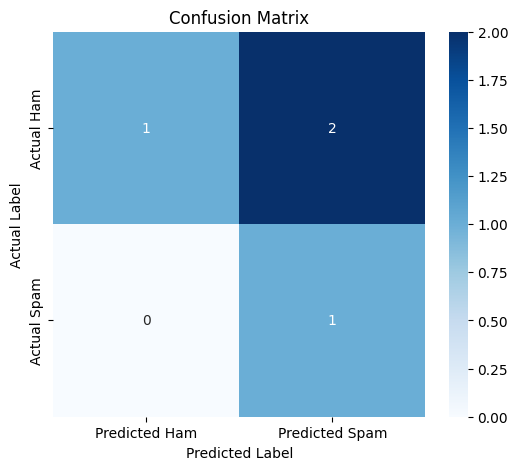


--- Example Prediction ---
Email: "Claim your free prize now!" 
Predicted Label: spam
Email: "Hi team, just a quick update on the project." 
Predicted Label: ham
Email: "Nigerian prince wants to give you money. Act fast!" 
Predicted Label: spam


In [4]:
# --- Model Prediction ---
# Make predictions on the test set
y_pred = model.predict(X_test)

# --- Model Evaluation ---
print("\n--- Model Evaluation ---")
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Spam): {precision:.4f}")
print(f"Recall (Spam): {recall:.4f}")
print(f"F1-Score (Spam): {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])
print("\nConfusion Matrix:")
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Ham', 'Predicted Spam'], yticklabels=['Actual Ham', 'Actual Spam'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# --- Example Prediction ---
print("\n--- Example Prediction ---")
new_emails = [
    "Claim your free prize now!", # Should be spam
    "Hi team, just a quick update on the project.", # Should be ham
    "Nigerian prince wants to give you money. Act fast!" # Should be spam
]

# Transform new emails using the *same* vectorizer used for training
new_emails_transformed = tfidf_vectorizer.transform(new_emails)
predictions = model.predict(new_emails_transformed)

for i, email in enumerate(new_emails):
    print(f"Email: \"{email}\" \nPredicted Label: {predictions[i]}")


6. Conclusion and Next Steps
This notebook demonstrated a basic spam email detection model using TF-IDF for feature extraction and Multinomial Naive Bayes for classification. Even with a small synthetic dataset, the model shows reasonable performance.

Further Improvements and Next Steps:

Larger, Real-world Dataset: Use a much larger and more diverse dataset of emails (e.g., Enron dataset, Kaggle spam datasets).

Advanced Preprocessing:

Lowercasing (already done).

Removing punctuation, numbers, and special characters.

Stemming (reducing words to their root, e.g., "running" to "run") in addition to or instead of lemmatization.

Handling misspellings.

Hyperparameter Tuning: Optimize the TfidfVectorizer (e.g., ngram_range, min_df, max_df) and MultinomialNB parameters for better performance using techniques like Grid Search or Random Search.

Other Models: Experiment with other classification algorithms like Logistic Regression, Support Vector Machines (SVM), Random Forest, or deep learning models (e.g., LSTMs, Transformers) for more complex patterns.

Cross-Validation: Use cross-validation techniques (e.g., KFold) for a more robust evaluation of the model's performance across different splits of the data.

Ensemble Methods: Combine multiple models to improve predictive accuracy.

Feature Engineering: Create additional features from the email content (e.g., presence of URLs, specific keywords, length of email, number of exclamation marks).